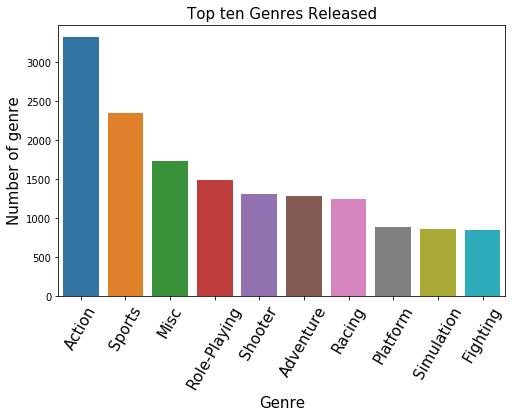

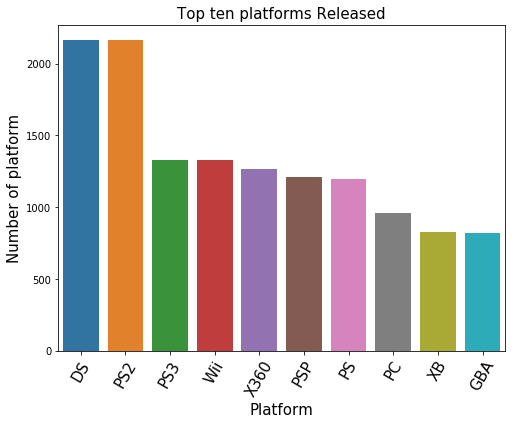

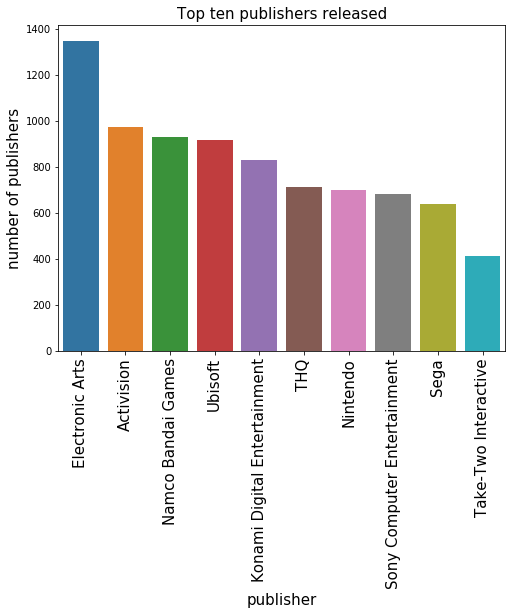

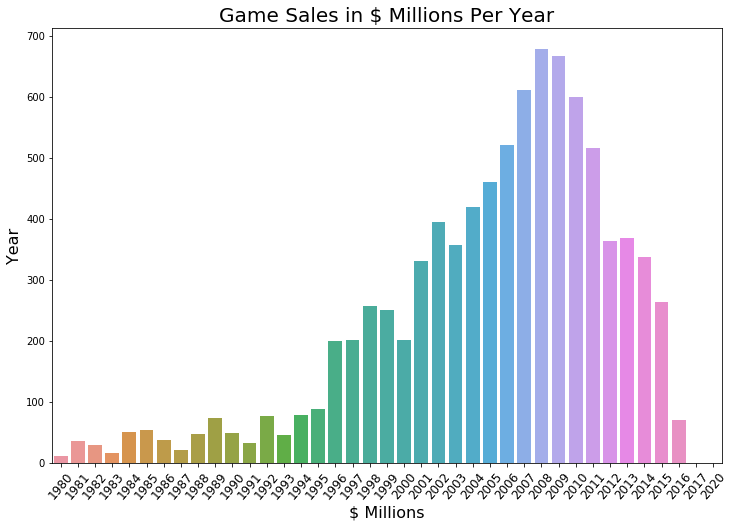

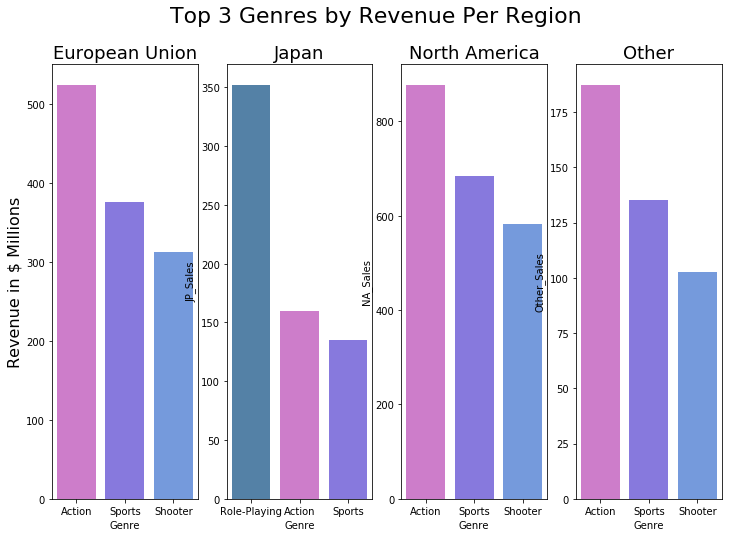

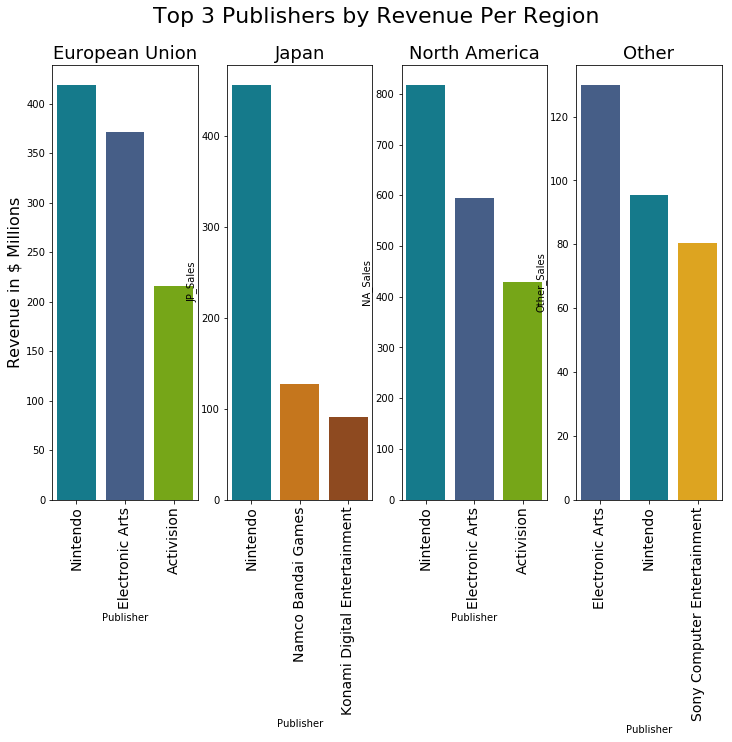

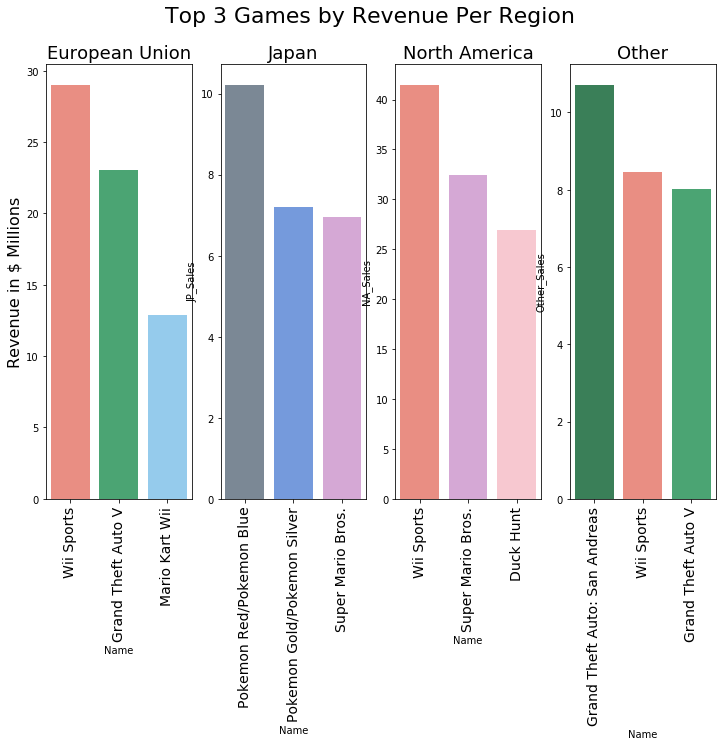

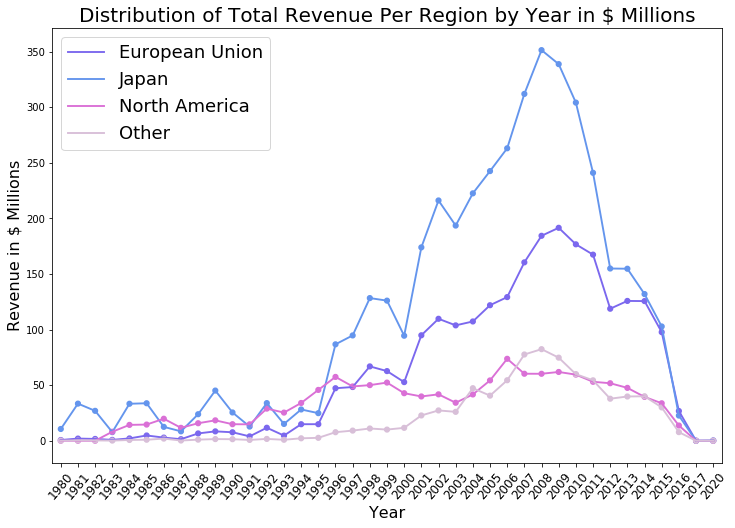

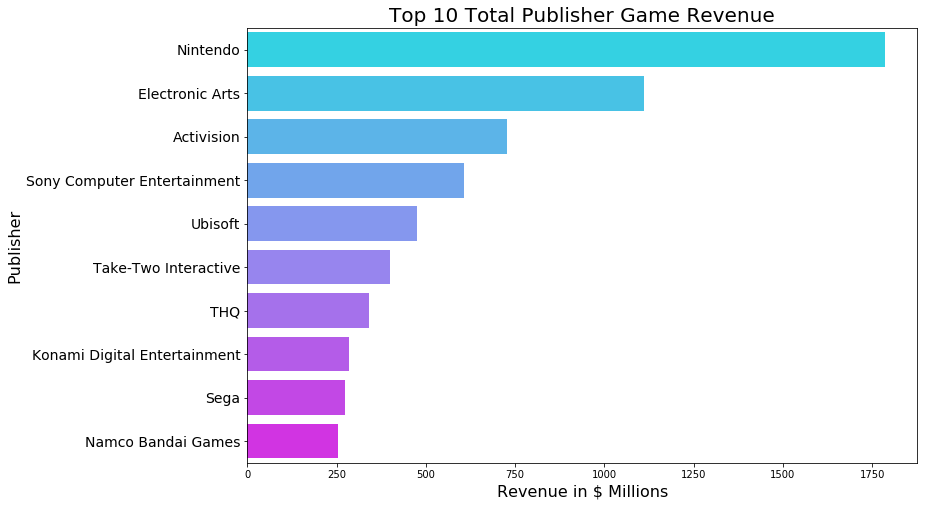

In [4]:
%matplotlib inline
import numpy as np 
import colorsys
from scipy import stats
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
df=pd.read_csv("vgsales.csv")
for x in df.Year:
    if x=='N/A':
        df['Year']=df['Year'].replace(x,df['Year'].median())

#Graph1
genre = Counter(df['Genre'].dropna().tolist()).most_common(10)
genre_name = [name[0] for name in genre]
genre_counts = [name[1] for name in genre]

fig,ax = plt.subplots(figsize=(8,5))
sns.barplot(x=genre_name,y=genre_counts,ax=ax)
plt.title('Top ten Genres Released',fontsize=15)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Number of genre',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15,rotation=60)



#Graph2
platform = Counter(df['Platform'].dropna().tolist()).most_common(10)
platform_name = [name[0] for name in platform]
platform_count = [name[1] for name in platform]

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x=platform_name,y=platform_count,ax=ax)
plt.title('Top ten platforms Released',fontsize=15)
plt.ylabel('Number of platform',fontsize=15)
plt.xlabel('Platform',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15,rotation=60)

#Graph3
publisher = Counter(df['Publisher'].dropna().tolist()).most_common(10)
publisher_name = [name[0] for name in publisher]
publisher_count = [name[1] for name in publisher]

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x=publisher_name,y=publisher_count,ax=ax)
plt.title('Top ten publishers released',fontsize=15)
plt.ylabel('number of publishers',fontsize=15)
plt.xlabel('publisher',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15,rotation=90)

#Graph4
y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='$ Millions', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();



#Graph5
EU = df.pivot_table('EU_Sales', columns='Genre', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_genres = EU.index

JP = df.pivot_table('JP_Sales', columns='Genre', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_genres = JP.index

NA = df.pivot_table('NA_Sales', columns='Genre', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_genres = NA.index

Other = df.pivot_table('Other_Sales', columns='Genre', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_genres = Other.index

colors =  {'Action':"orchid", 'Sports':"mediumslateblue", 'Shooter':"cornflowerblue", 'Role-Playing':"steelblue"}
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(1,4,1)
sns.barplot(x=EU_genres, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)



ax2 = fig.add_subplot(1,4,2)
sns.barplot(x=JP_genres, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3)
sns.barplot(x=NA_genres,y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4)
sns.barplot(x=Other_genres, y=Other['Other_Sales'],palette=colors)
plt.title('Other', size=18)

plt.suptitle('Top 3 Genres by Revenue Per Region', size=22)
plt.show();
EU = df.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_publishers = EU.index

JP = df.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_publishers = JP.index

NA = df.pivot_table('NA_Sales', columns='Publisher', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_publishers = NA.index

Other = df.pivot_table('Other_Sales', columns='Publisher', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_publishers = Other.index

colors =  {'Nintendo':sns.xkcd_rgb["teal blue"], 'Electronic Arts':sns.xkcd_rgb["denim blue"], 'Activision':sns.xkcd_rgb["dark lime green"], 'Namco Bandai Games':sns.xkcd_rgb["pumpkin"], 'Konami Digital Entertainment':sns.xkcd_rgb["burnt umber"], 'Sony Computer Entertainment':sns.xkcd_rgb["yellow orange"]}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_publishers, rotation=90, size=14)
#turn_off_labels(ax1)
sns.barplot(x=EU_publishers, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = JP_publishers, rotation=90, size=14)
#turn_off_labels(ax2, first=False)
sns.barplot(x=JP_publishers, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = NA_publishers, rotation=90, size=14)
#turn_off_labels(ax3, first=False)
sns.barplot(x=NA_publishers, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other_publishers, rotation=90, size=14)
#turn_off_labels(ax4, first=False)
sns.barplot(x=Other_publishers, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Publishers by Revenue Per Region', size=22)
plt.show();







EU = df.pivot_table('EU_Sales', columns='Name', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_games = EU.index

JP = df.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_games = JP.index

NA = df.pivot_table('NA_Sales', columns='Name', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_games = NA.index

Other = df.pivot_table('Other_Sales', columns='Name', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_games = Other.index

colors =  {'Wii Sports':"salmon", 'Grand Theft Auto V':"mediumseagreen", 'Mario Kart Wii':"lightskyblue", 'Pokemon Red/Pokemon Blue':"lightslategray", 'Pokemon Gold/Pokemon Silver':"cornflowerblue", 'Super Mario Bros.':"plum", 'Duck Hunt':"pink", 'Grand Theft Auto: San Andreas':"seagreen"}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_games, rotation=90, size=14)
#turn_off_labels(ax1)
sns.barplot(x=EU_games, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = JP_games, rotation=90, size=14)
#turn_off_labels(ax2, first=False)
sns.barplot(x=JP_games, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = NA_games, rotation=90, size=14)
#turn_off_labels(ax3, first=False)
sns.barplot(x=NA_games, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other_games, rotation=90, size=14)
#turn_off_labels(ax4, first=False)
sns.barplot(x=Other_games, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Games by Revenue Per Region', size=22)
plt.show();



EU = df.pivot_table('EU_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
NA = df.pivot_table('NA_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
JP = df.pivot_table('JP_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
Other = df.pivot_table('Other_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
years = Other.index.astype(int)
regions = ['European Union','Japan','North America','Other']

plt.figure(figsize=(12,8))
ax = sns.pointplot(x=years, y=EU, color='mediumslateblue', scale=0.7)
ax = sns.pointplot(x=years, y=NA, color='cornflowerblue', scale=0.7)
ax = sns.pointplot(x=years, y=JP, color='orchid', scale=0.7)
ax = sns.pointplot(x=years, y=Other, color='thistle', scale=0.7)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue in $ Millions', fontsize=16)
ax.set_title(label='Distribution of Total Revenue Per Region by Year in $ Millions', fontsize=20)
ax.legend(handles=ax.lines[::len(years)+1], labels=regions, fontsize=18)
plt.show();



data = df.groupby(['Publisher']).sum()['Global_Sales']
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
publishers = data.index
data.columns = ['Global Sales']

colors = sns.color_palette("cool", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Global Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Game Revenue', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();




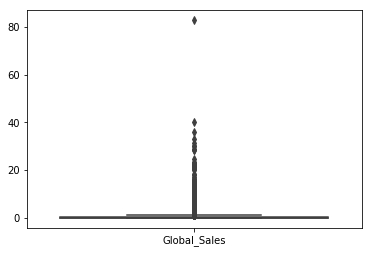

In [20]:
sns.boxplot(data=df[['Global_Sales']])  

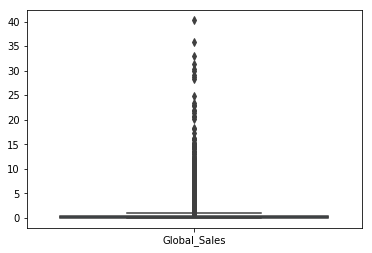

In [21]:
for x in df.Global_Sales:
    if x>80:
        df['Global_Sales']=df['Global_Sales'].replace(x,df['Global_Sales'].mean())
sns.boxplot(data=df[['Global_Sales']])    

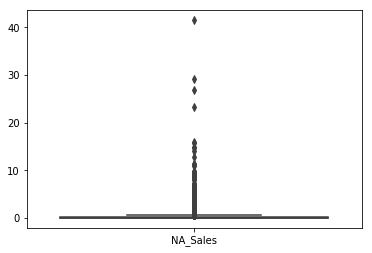

In [17]:
sns.boxplot(data=df[['NA_Sales']])  


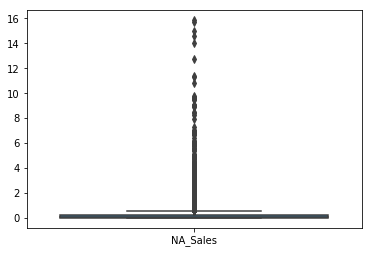

In [18]:
for x in df.NA_Sales:
    if x>20:
        df['NA_Sales']=df['NA_Sales'].replace(x,df['NA_Sales'].mean())
sns.boxplot(data=df[['NA_Sales']])    

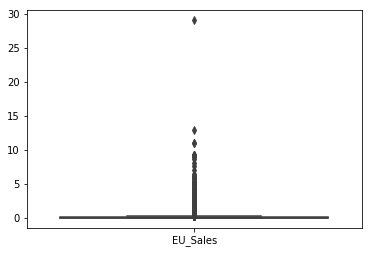

In [30]:
sns.boxplot(data=df[['EU_Sales']])  

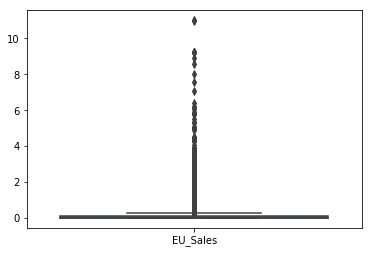

In [10]:
for x in df.EU_Sales:
    if x>12:
        df['EU_Sales']=df['EU_Sales'].replace(x,df['EU_Sales'].mean())
sns.boxplot(data=df[['EU_Sales']])    

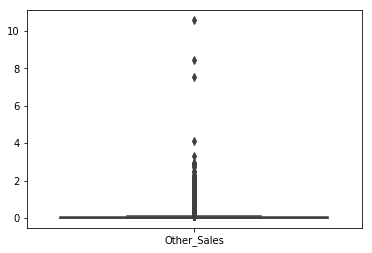

In [15]:
sns.boxplot(data=df[['Other_Sales']])   

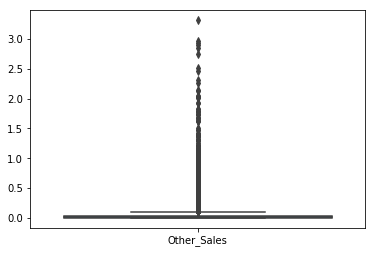

In [16]:
for x in df.Other_Sales:
    if x>4:
        df['Other_Sales']=df['Other_Sales'].replace(x,df['Other_Sales'].mean())
sns.boxplot(data=df[['Other_Sales']])    

In [10]:
from random import sample
from statistics import mean
from scipy.stats import norm 
import numpy as np
import math
pop_mean=np.mean(df.Global_Sales)
std=np.std(df.Global_Sales)
print('Population sales mean=',pop_mean)
print('Standard deviation=',std)
z=[]
sam=[]
count=0
for x in df.Publisher:
    if x=='Nintendo':
        z.append(df.Global_Sales)
        count=count+1
print(count)
for i in range(1,500):
    sam.append(np.mean(sample(z,50)))

mu_smp = np.mean(sam)
print('Sample mean=',mu_smp) 
z=(mu_smp-pop_mean)*math.sqrt(500)/std
print('Z-value=',z)
p=norm.pdf(z)
print('P-value=',p)

Population sales mean= 0.53744065550074
Standard deviation= 1.5549810910296504
703
Sample mean= 0.5374406555006627
Z-value= -1.1127635665766147e-12
P-value= 0.3989422804014327
